## PDF

PDF are also unstructured data. And it might contains a combinations of images and text.

We will discuss extracting data from pdf in the following exercise. 

## Extract text from pdf 

In [1]:
!pip install pypdf

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 KB 8.9 MB/s eta 0:00:00


In [3]:
# pypdf is a library that allows us to read pdf files
from pypdf import PdfReader
import os

# A knowledge is that the syntax of windows and linux/macOS is different. 

script_directory = os.getcwd()
folder_name = 'Pdf'
file_name = 'humanity_paper'

# we keep append the name of the image to the path, so we can use it to save the image
Specific_pdf = os.path.join(script_directory, folder_name, f'{file_name}.pdf')

location = Specific_pdf

reader = PdfReader(location)
# Initialize an empty string to store extracted text from all pages
all_text = ""

# Iterate through all pages and extract text
for page in reader.pages:
    text = page.extract_text()
    all_text += text

# Print or use the extracted text from all pages
print(all_text)

Technological Forecasting & Social Change 186 (2023) 122154
Available online 17 November 2022
0040-1625/© 2022 Elsevier Inc. All rights reserved.Examining the role of virtue ethics and big data in enhancing viable, 
sustainable, and digital supply chain performance 
Surajit Baga,b,*, Muhammad Sabbir Rahmanc, Gautam Srivastavad, Adam Shoree, 
Pratibha Ramf 
aCentre for Data Science, Institute of Management Technology, Ghaziabad, India 
bDepartment of Transport and Supply Chain Management, University of Johannesburg, South Africa 
cDepartment of Marketing and International Business, School of Business and Economics, North South University, Dhaka, Bangladesh 
dIILM Graduate School of Management, 16, Knowledge Park II, Greater Noida, Uttar Pradesh 201306, India 
eFaculty of Business and Law, Liverpool Business School, United Kingdom of Great Britain and Northern Ireland 
fDepartment of Materials, Alliance Manchester Business School, United Kingdom of Great Britain and Northern Ireland   
A

In [4]:
import os
# Save the extracted text to a .txt file

# Get the directory where the script is located
# The reason we use os.getcwd() instead of directly specifying the path is because we want the script can be run from any directory
script_directory = os.getcwd()

# A knowledge is that the syntax of windows and linux/macOS is different. 
# `os.path.join()` joins the path of the script directory with the name of the folder we want to create. With this we ensure the script works for any OS. 
txts_path = os.path.join(script_directory, 'Txt')

# Check if the folder exists, and if not, create it
if not os.path.exists(txts_path):
    os.makedirs(txts_path)

# we keep append the name of the image to the path, so we can use it to save the image
output_file_path = os.path.join(txts_path, f'{file_name}.txt')

# content manager `with` is used to open the file and close it automatically
# 'utf-8' is the encoding of the text. It is important to specify it, otherwise the text might not be saved correctly
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # .write() is used to write the text to the file
    output_file.write(all_text)
    # .close() is not needed because the content manager `with` will close it automatically

print(f"Text extracted from the PDF and saved to: {output_file_path}")

Text extracted from the PDF and saved to: c:\Users\kinla\Documents\All_github_repo\prog-for-humanists\colabs\New colabs\Txt\humanity_paper.txt


In [5]:
!pip install PyMuPDF Pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Extract images from PDF

In [6]:
# Import required dependencies
# fitz is the library used to extract images from PDF
import fitz
import os
from PIL import Image
# io is used to convert image bytes to PIL Image object
import io

# Define path for saved images
# Get the directory where the script is located
script_directory = os.getcwd()

# Define path for saved images inside the "Image" folder in the script directory
images_path = os.path.join(script_directory, 'Image')

# Create the directory if it doesn't exist
if not os.path.exists(images_path):
    os.makedirs(images_path)

# Define path to PDF file
location = Specific_pdf # We don't need to specify the path again, we can use the one we defined before

# Open PDF file
pdf_file = fitz.open(location)

# Get the number of pages in PDF file
page_nums = len(pdf_file)

# Create empty list to store images information
images_list = []

# Extract all images information from each page

# for loop to iterate through all pages, i is the page number, starting from 0, it will go up to the number of pages - 1. 
# each iteration the variable i will be increased by 1

# range() function to generate a sequence of numbers from 0 to the number of pages
for i in range(page_nums):
    page_content = pdf_file[i] # [] is used to access the page by its number
    images_list.extend(page_content.get_images())

# Raise error if PDF has no images
if len(images_list) == 0:
    raise ValueError(f'No images found in {location}')

# Save all the extracted images
for i, img in enumerate(images_list, start=1):
    # Extract the image object number
    xref = img[0]
    # Extract image
    base_image = pdf_file.extract_image(xref)
    # Store image bytes
    image_bytes = base_image['image']
    # Convert image bytes to PIL Image object
    pil_image = Image.open(io.BytesIO(image_bytes))
    # Generate image file name
    image_name = str(i) + '.jpg'
    # Save image in JPEG format
    pil_image.save(os.path.join(images_path, image_name))


# Close the PDF file
pdf_file.close()


There are totally 6 images in the pdf.


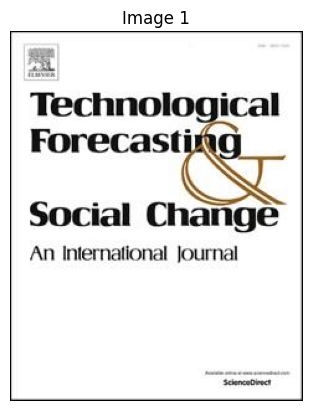

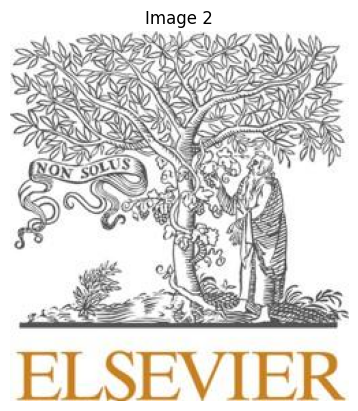

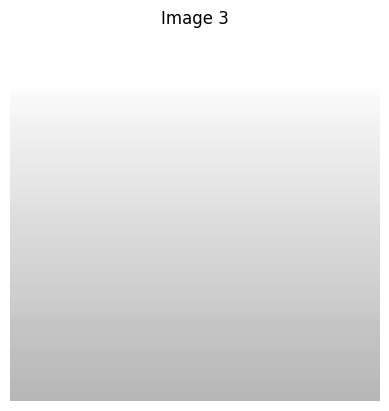

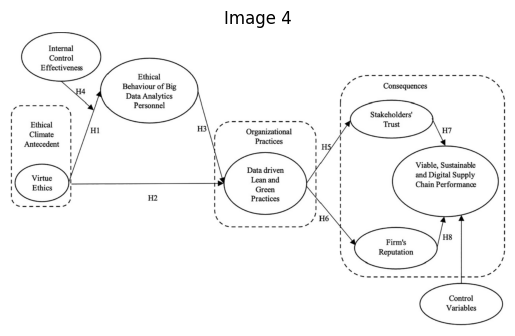

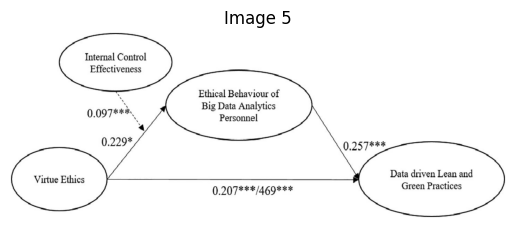

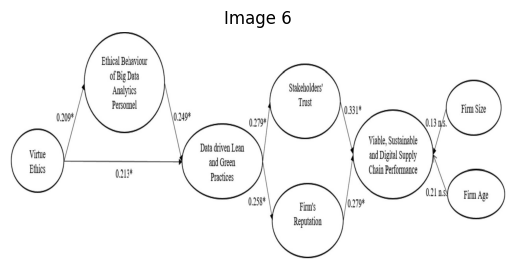

In [7]:
# Import required dependencies
import fitz
import os
# PIL is used to display the images
from PIL import Image
# plt is used to display the images
import matplotlib.pyplot as plt

print(f"There are totally {len(images_list)} images in the pdf.")

# Display all the saved images using Matplotlib
# range() function to generate a sequence of numbers from 1 to the number of images
for i in range(1, len(images_list) + 1):
    image_path = os.path.join(images_path, f"{i}.jpg")
    img = Image.open(image_path)
    img = img.convert('RGB')
    
    # D# plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.axis('off')
    plt.show()


## Identify bibliography from pdf with regex

In [8]:
import fitz  # PyMuPDF
from pprint import pprint
import re

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_document:
        for page_num in range(pdf_document.page_count):
            page = pdf_document[page_num]
            blocks = page.get_text("blocks")
            for b in blocks:
                if b[4] != "\n":  # Check if the block ends with a newline symbol
                    text += b[4] + " "
                else:
                    text += b[4]  # If there's a newline symbol, concatenate without adding a space
    return text

def extract_paper_titles(text):
    # Regular expression pattern to match paper titles
    title_pattern = r"\d{4}\.\s(.*?)(?=\.\s[A-Z]|\.$)"
    paper_titles = re.findall(title_pattern, text, re.DOTALL)
    return paper_titles

# Example usage
pdf_path = Specific_pdf  # Replace with the path to your specific PDF file
pdf_text = extract_text_from_pdf(pdf_path)
cited_paper_titles = extract_paper_titles(pdf_text)

# Print extracted paper titles
all_paper_titles = []
for title in cited_paper_titles:
    all_paper_titles.append(title)

# Print the single list of paper titles
pprint(all_paper_titles)


['The rise in demand, owing to the \n'
 'COVID-19 pandemic, caused the growth to be larger than projected, as \n'
 'more individuals worked from home and frequently used home \n'
 ' * Corresponding author. \n'
 'E-mail addresses: surajit.bag@gmail.com (S',
 ' \n'
 ' 2 https://minerva-access.unimelb.edu.au/bitstream/handle/11343/22 \n'
 '7494/BigData-%20Can%20Virtue%20Ethics%20Play%20a%20Role% \n'
 '20unimelb.pdf?sequence=1&isAllowed=y. \n'
 ' S',
 ' \n'
 ' 5 Retrieved from https://economictimes.indiatimes.com/tech/technology/ \n'
 'personal-details-of-6-1-million-facebook-users-in-india-leaked-online/articl \n'
 'eshow/81916959.cms on 1.02.2022.  \n'
 ' 6 Retrieved \n'
 'from \n'
 'https://www.91mobiles.com/hub/5-major-data-breach \n'
 'es-india-2021/ on 1.02.2022.  \n'
 ' 7 Retrieved from https://analyticsindiamag.com/pnb-scam-can-data-analytic \n'
 's-clean-mess/ on 1.02.2022.  \n'
 ' 8 Retrieved from https://analyticsindiamag.com/pnb-scam-can-data-analytic \n'
 's-clean-mess/ on 1.0